In [1]:
import pandas as pd
import numpy as np
import nltk
import math
import matplotlib.pyplot as plt
import re
from tqdm import tqdm 

In [2]:
file = pd.read_csv("documents.csv")

In [3]:
file

,id_right,text_right
0,1781133,it was used in landing craft during world war ...
1,2426736,after rejecting an offer from cambridge univer...
2,2224122,mat zan coached kuala lumpur fa in 1999 and wo...
3,219642,a barcode is a machine readable optical label ...
4,1728654,since the subordination of the monarchy under ...
...,...,...
369716,59396,the population was 416 at the 2010 census the ...
369717,1950034,the surface of the river is frozen from novemb...
369718,1984468,the first anti thrombin aptamer tba was genera...
369719,33966,state of oklahoma as of the 2010 census the po...


In [4]:
frequency = pd.Series(' '.join(file.text_right).split()).value_counts()

In [5]:
stop_list = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

In [6]:
df = pd.DataFrame(frequency, columns=["frequency"])
top30 = df.head(30)[:]

In [7]:
top30

,frequency
the,5311943
of,2532382
in,2355417
and,2231007
a,1557760
to,1407261
was,1078183
he,685303
is,676829
as,661622


In [29]:
top30.index

Index(['the', 'of', 'in', 'and', 'a', 'to', 'was', 'he', 'is', 'as', 'for',
       'on', 'with', 'by', 's', 'at', 'his', 'from', 'it', 'that', 'an',
       'which', 'first', 'are', 'were', 'has', 'also', 'she', 'after', 'its'],
      dtype='object')

In [8]:
is_stop = []
for i in top30.index:
    if i in stop_list:
        is_stop.append('yes')
    else:
        is_stop.append('no')

In [9]:
top30["stop_word?"] = is_stop

In [10]:
top30

,frequency,stop_word?
the,5311943,yes
of,2532382,yes
in,2355417,yes
and,2231007,yes
a,1557760,yes
to,1407261,yes
was,1078183,yes
he,685303,yes
is,676829,yes
as,661622,yes


In [11]:
# documents
doc_num = file.shape[0]
doc_num

369721

In [12]:
# Collection size in words
number_of_words = file['text_right'].apply(lambda n: len(n.split()))
collection_size = np.sum(number_of_words)
collection_size

73093729

In [13]:
number_of_words

0         200
1         175
2         197
3         200
4         200
         ... 
369716    200
369717    200
369718    200
369719    200
369720    200
Name: text_right, Length: 369721, dtype: int64

In [14]:
# Avg. document length in words
avg_doc_size = collection_size / doc_num
avg_doc_size

197.69969517555128

In [15]:
# unique words
num_unique_words = df.shape[0]
# num_unique_words = df[df['frequency'] == 1].shape[0]
num_unique_words

794568

In [16]:
# Avg. word length
total_words_len = 0
for i in range(len(df)):
    total_words_len += len(df.index[i])*df['frequency'][i]
avg_word_len = total_words_len / collection_size

In [17]:
avg_word_len

4.795127048450353

In [18]:
df[df['frequency'] == 1]

,frequency
wonderhorse,1
unyeada,1
jestofunk,1
svyaztie,1
nuttell,1
...,...
kanthy,1
lusion,1
tractoration,1
bupc,1


In [19]:
unique_words = df.index[:]
# unique_words = (df[df['frequency'] == 1]).index[:]

In [20]:
unique_words

Index(['the', 'of', 'in', 'and', 'a', 'to', 'was', 'he', 'is', 'as',
       ...
       'walloomsac', 'harleman', 'bertoldistra', 'buchforst', 'instinctually',
       'kanthy', 'lusion', 'tractoration', 'bupc', 'danielraj'],
      dtype='object', length=794568)

In [21]:
# Avg. unique word length
unique_words_total_len = 0
for i in range(len(unique_words)):
    unique_words_total_len += len(unique_words[i])
unique_words_len = unique_words_total_len / num_unique_words

In [22]:
unique_words_len

7.714459932944695

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


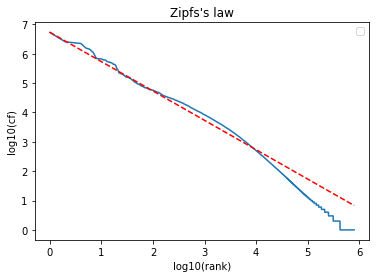

In [23]:
# Zipf's law  

rank = np.arange(len(df)) + 1
cf = np.array(list(df["frequency"]))

x = np.log10(rank)
y = np.log10(cf)
plt.plot(x, y)
plt.plot(x, np.log10(cf.sum() / np.log(len(cf)) / rank), 'r--')
plt.xlabel('log10(rank)')
plt.ylabel('log10(cf)')
plt.title("Zipfs's law")
plt.legend()
plt.show()

In [27]:
# Heap's law
size = []
vocab_size = []

total_length = 0
total_unique_words = set()

for index, row in tqdm(file.iterrows(), total=file.shape[0]):
    
    tokens = row['text_right'].split()
    
    total_length += len(tokens)
    size.append(total_length)
    
    total_unique_words.update(tokens)
    vocab_size.append(len(total_unique_words))

100%|████████████████████████████████████████████████████████████████████████| 369721/369721 [00:49<00:00, 7481.22it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


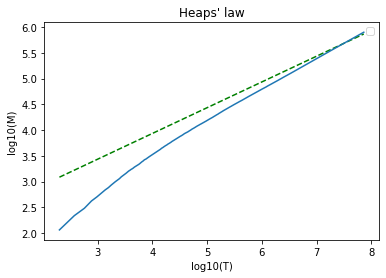

In [28]:
T = np.array(size)
k = 86
b = 0.5
plt.plot(np.log10(T), np.log10(k*T**b), 'g--')
x = np.log10(size)
y = np.log10(vocab_size)
plt.plot(x, y)

plt.xlabel('log10(T)')
plt.ylabel('log10(M)')
plt.title("Heaps' law")
plt.legend()
plt.show()